In [118]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)

In [108]:
ndvi_31 = pd.read_csv("../data/NDVI/Lettuce_2017-03-31.csv", header=None)
ndvi_07 = pd.read_csv("../data/NDVI/Lettuce_2017-04-07.csv", header=None)
ndvi_14 = pd.read_csv("../data/NDVI/Lettuce_2017-04-14.csv", header=None)
ndvi_28 = pd.read_csv("../data/NDVI/Lettuce_2017-04-28.csv", header=None)
wp_df = pd.read_csv("../data/WaterPotential/Lettuce.csv")

### Find NDVI & WP correlation with repeating WP values
#### Remove 32 because it was missed during spectra collection

In [64]:
wp_31 = wp_df["03/31/17"].as_matrix()
wp_07 = np.repeat(wp_df["04/07/17"].as_matrix(), 3)
wp_14 = np.repeat(wp_df["04/14/17"].as_matrix(), 3)
wp_28 = np.repeat(wp_df["04/28/17"].as_matrix(), 3)
wp_28 = np.delete(wp_28, 32)
print(wp_31.shape, wp_07.shape, wp_14.shape, wp_28.shape)

(12,) (36,) (36,) (35,)


In [68]:
ndvi = np.concatenate((ndvi_31.as_matrix(), ndvi_07.as_matrix(), ndvi_14.as_matrix(), ndvi_28.as_matrix()), axis=0)
ndvi = ndvi.squeeze()
wp = np.concatenate((wp_31, wp_07, wp_14, wp_28), axis=0)

In [69]:
print(ndvi.shape, wp.shape)

(119,) (119,)


In [71]:
stats.pearsonr(ndvi, wp)

(0.14040912894565716, 0.12774094521821691)

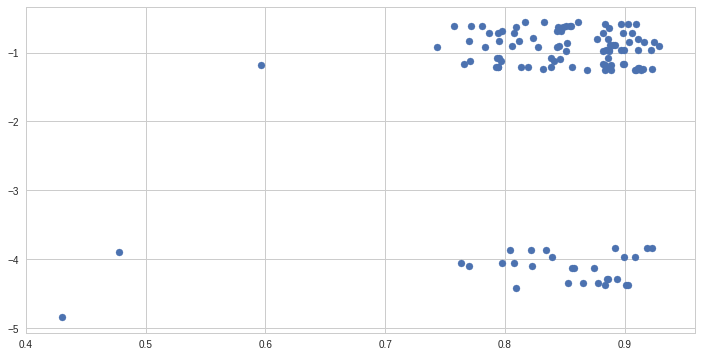

In [72]:
plt.scatter(ndvi, wp)

### Find NDVI & WP correlation with non-repeating WP values

In [110]:
ndvi_31_sub = ndvi_31.as_matrix().squeeze()
ndvi_07_sub = ndvi_07.as_matrix()[::3].squeeze()
ndvi_14_sub = ndvi_14.as_matrix()[::3].squeeze()
ndvi_28_sub = np.insert(ndvi_28.as_matrix(), 32, 0)[::3].squeeze()

In [111]:
ndvi = np.concatenate((ndvi_31_sub, ndvi_07_sub, ndvi_14_sub, ndvi_28_sub), axis=0)
wp = np.concatenate((wp_df["03/31/17"], wp_df["04/07/17"], wp_df["04/14/17"], wp_df["04/28/17"]), axis=0)
print(ndvi.shape, wp.shape)

(48,) (48,)


In [113]:
stats.pearsonr(ndvi, wp)

(0.3680197200678052, 0.010066862207092835)

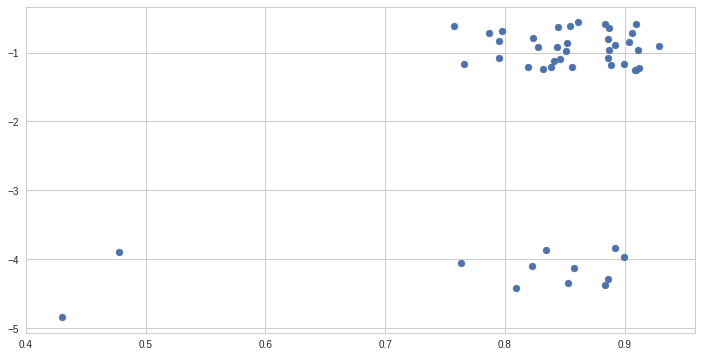

In [114]:
plt.scatter(ndvi, wp)